In [1]:
import numpy as np
from climada.hazard.tc_tracks import TCTracks
from climada.hazard import TropCyclone
from climada.hazard import Centroids
import warnings
warnings.filterwarnings('ignore')

### Load TC tracks from International Best Track Archive for Climate Stewardship (IBTrACS)

In [2]:
tracks_2024 = TCTracks.from_ibtracs_netcdf(provider='usa', basin='WP', year_range=(2024, 2024))

<GeoAxes: >

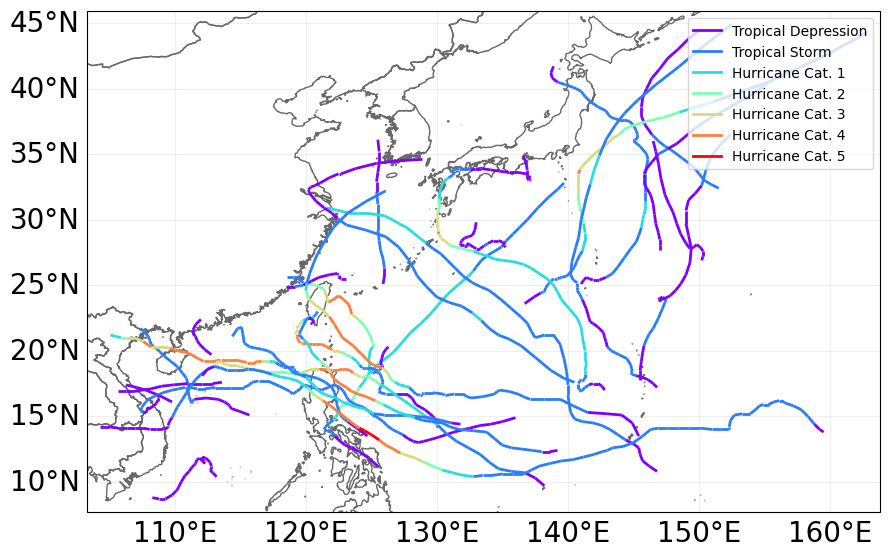

In [3]:
tracks_2024.plot()

<GeoAxes: >

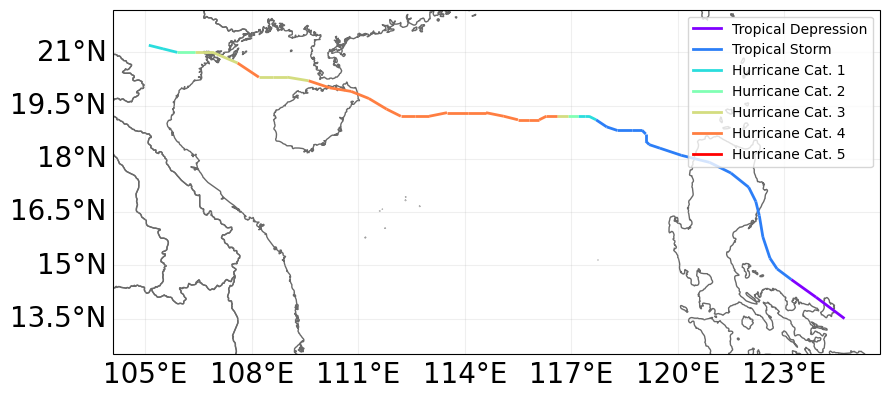

In [4]:
tracks_2024.subset({"sid": "2024246N14125"}).plot() # Yagi

<GeoAxes: >

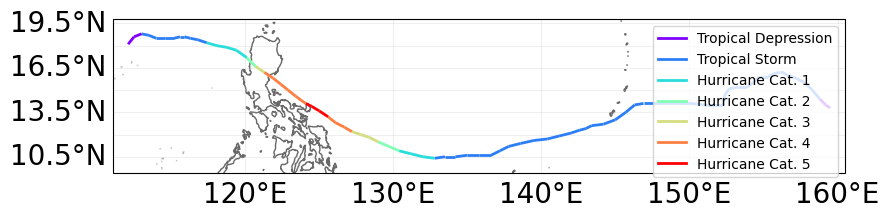

In [5]:
tracks_2024.subset({"sid": "2024314N14160"}).plot() # Man-Yi

In [8]:
tr_yagi = TCTracks.from_ibtracs_netcdf(provider='usa', storm_id='2024246N14125')

In [10]:
tr_yagi.get_track('2024246N14125')

<xarray.Dataset> Size: 3kB
Dimensions:                 (time: 51)
Coordinates:
  * time                    (time) datetime64[ns] 408B 2024-09-01T12:00:00 .....
    lat                     (time) float32 204B 13.5 14.1 14.6 ... 21.1 21.2
    lon                     (time) float32 204B 124.7 123.9 ... 105.5 105.1
Data variables:
    radius_max_wind         (time) float32 204B 35.0 29.0 22.0 ... 22.0 22.0
    radius_oci              (time) float32 204B 183.0 157.0 ... 180.0 134.0
    max_sustained_wind      (time) float32 204B 29.0 32.0 35.0 ... 67.0 60.0
    central_pressure        (time) float32 204B 999.0 998.0 ... 978.0 986.0
    environmental_pressure  (time) float64 408B 1.007e+03 ... 1.003e+03
    time_step               (time) float64 408B 3.0 3.0 3.0 3.0 ... 3.0 3.0 3.0
    basin                   (time) <U2 408B 'WP' 'WP' 'WP' ... 'WP' 'WP' 'WP'
Attributes:
    max_sustained_wind_unit:  kn
    central_pressure_unit:    mb
    orig_event_flag:          True
    data_provider:            ibtracs_usa
    category:                 4
    name:                     YAGI
    sid:                      2024246N14125
    id_no:                    2024246014125.0

### Generate probabilistic events

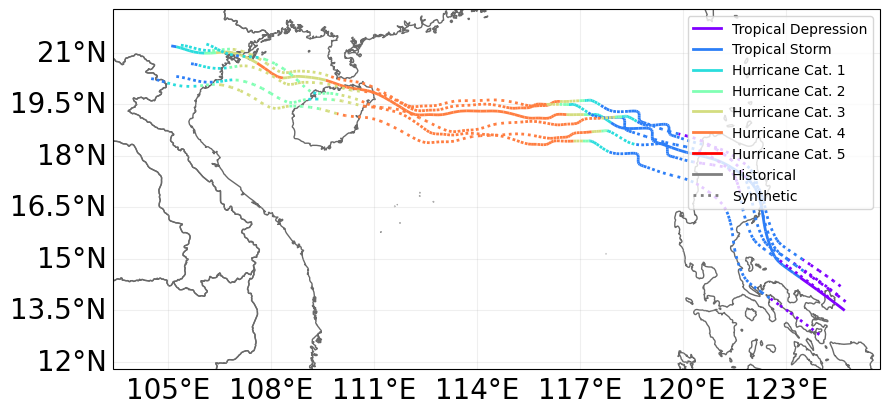

In [11]:
# here we use tr_yagi retrieved from IBTrACS with the function above
# select number of synthetic tracks (nb_synth_tracks) to generate per present tracks.
tr_yagi.equal_timestep()
tr_yagi.calc_perturbed_trajectories(nb_synth_tracks=5)
tr_yagi.plot();
# see more configutration options (e.g. amplitude of max random starting point shift in decimal degree; max_shift_ini)

### Plot affected areas

<GeoAxes: >

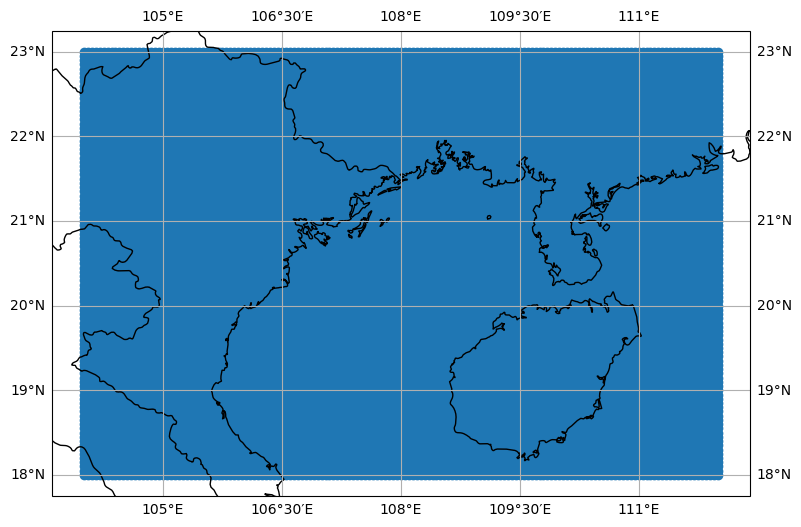

In [12]:
min_lat, max_lat, min_lon, max_lon = 18.0, 23.0, 104.0, 112.0
cent = Centroids.from_pnt_bounds((min_lon, min_lat, max_lon, max_lat), res=0.05)
#cent.check()
cent.plot()

In [13]:
haz = TropCyclone.from_tracks(tracks_2024, centroids=cent)
haz.check()

<GeoAxes: title={'center': 'Event ID 12: 2024246N14125'}>

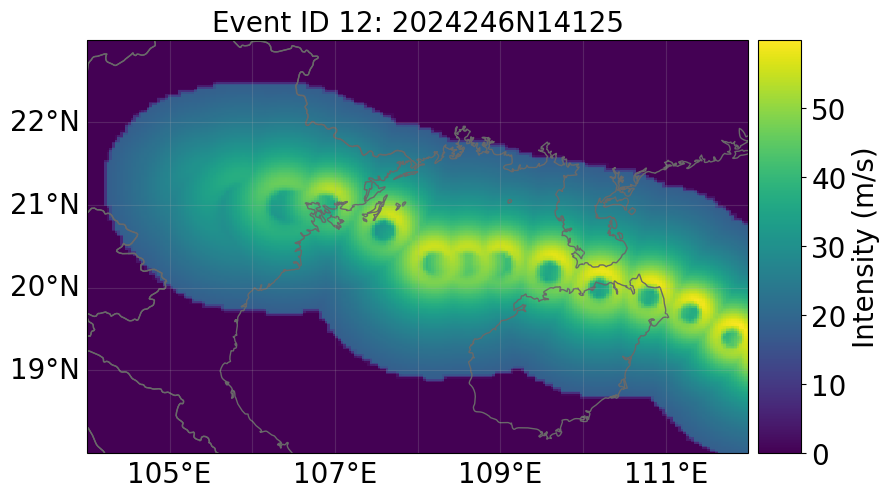

In [14]:
haz.plot_intensity(event='2024246N14125')

2025-02-05 15:47:37,453 - climada.hazard.base - WARNING - Return period 5.0 exceeds max. event return period.
2025-02-05 15:47:37,454 - climada.hazard.base - WARNING - Return period 10.0 exceeds max. event return period.
2025-02-05 15:47:37,455 - climada.hazard.base - WARNING - Return period 20.0 exceeds max. event return period.
2025-02-05 15:47:37,455 - climada.hazard.base - WARNING - Return period 40.0 exceeds max. event return period.


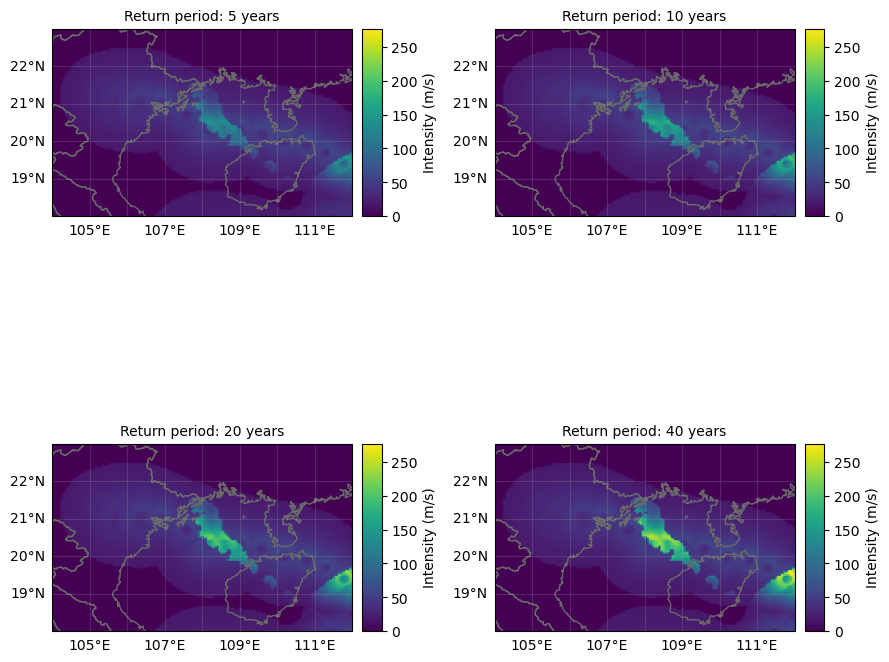

In [15]:
haz.plot_rp_intensity(return_periods=(5, 10, 20, 40));

### Implementing Climate Change

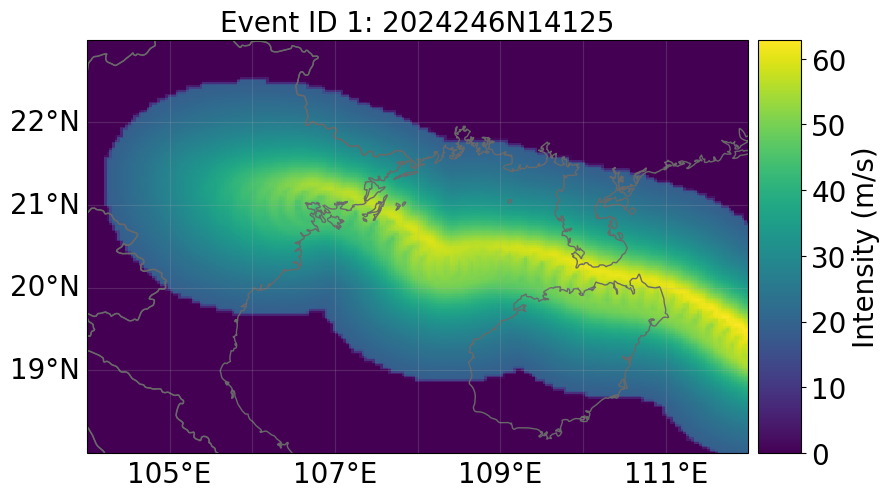

In [16]:
# a Yagi event-like in 2055 under RCP 4.5:
tc_yagi = TropCyclone.from_tracks(tr_yagi, centroids=cent)
tc_yagi_cc = tc_yagi.apply_climate_scenario_knu(ref_year=2055, rcp_scenario=45)
tc_yagi_cc.plot_intensity('2024246N14125');


%|                                                                                           | 0/14 [00:00<?, ?it/s]
%|█████▉                                                                             | 1/14 [00:05<01:07,  5.19s/it]
%|███████████▊                                                                       | 2/14 [00:10<01:06,  5.50s/it]
%|█████████████████▊                                                                 | 3/14 [00:22<01:33,  8.47s/it]
%|███████████████████████▋                                                           | 4/14 [00:34<01:35,  9.59s/it]
%|█████████████████████████████▋                                                     | 5/14 [00:46<01:35, 10.56s/it]
%|███████████████████████████████████▌                                               | 6/14 [00:58<01:29, 11.21s/it]
%|█████████████████████████████████████████▌                                         | 7/14 [01:10<01:20, 11.44s/it]
%|███████████████████████████████████████████████▍             

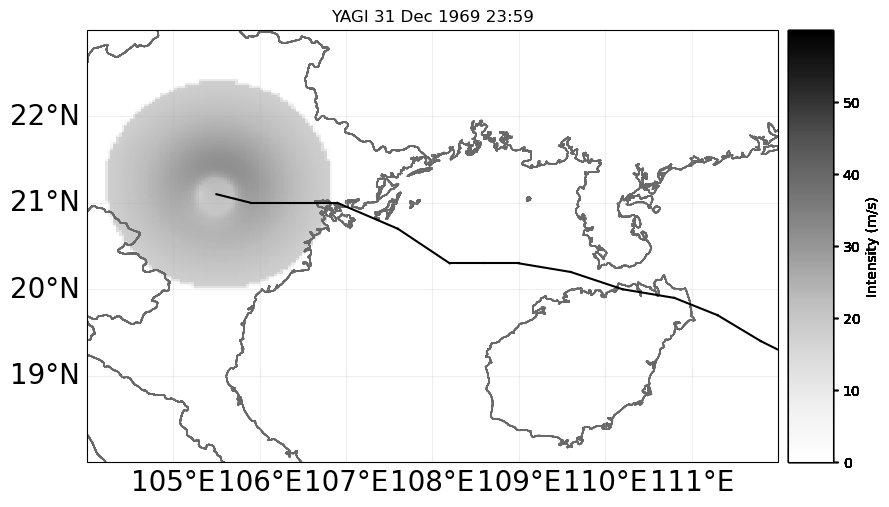

In [18]:
from climada.hazard import Centroids, TropCyclone, TCTracks

track_name = '2024246N14125'

tr_yagi = TCTracks.from_ibtracs_netcdf(provider='usa', storm_id='2024246N14125')

lon_min, lat_min, lon_max, lat_max = 104.0, 18.0, 112.0, 23.0
centr_video = Centroids.from_pnt_bounds((lon_min, lat_min, lon_max, lat_max), 0.04)
#centr_video.check()

tc_video = TropCyclone()

tc_list, tr_coord = tc_video.video_intensity(track_name, tr_yagi, centr_video, file_name='yagi_tc_fl.gif')